<a href="https://colab.research.google.com/github/akashgardas/Machine-Learning/blob/main/Assignments/Real_Estate_Market_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
os.listdir('drive/MyDrive/Tek works')

['Bengaluru_House_Data.csv']

## Data Loading and Inspection

In [44]:
# loading
df = pd.read_csv('drive/MyDrive/Tek works/Bengaluru_House_Data.csv')

In [45]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [46]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [47]:
df.shape

(13320, 9)

In [48]:
# datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Data Cleaning

In [49]:
# Missing values
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [50]:
# drop column - society
df = df.drop(['society'], axis=1)

In [51]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [52]:
# drop null values - location
df = df.dropna(subset='location')

In [53]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,16
total_sqft,0
bath,73
balcony,609
price,0


In [54]:
# filling numerical values
# Bath - with median value
df = df.fillna({'bath': df['bath'].median()})

In [55]:
# balcony - with median value
df = df.fillna({'balcony': df['balcony'].median()})

In [56]:
# size - most freq value
df = df.fillna({'size': df['size'].mode()[0]})

In [57]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13319 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13319 non-null  object 
 1   availability  13319 non-null  object 
 2   location      13319 non-null  object 
 3   size          13319 non-null  object 
 4   total_sqft    13319 non-null  object 
 5   bath          13319 non-null  float64
 6   balcony       13319 non-null  float64
 7   price         13319 non-null  float64
dtypes: float64(3), object(5)
memory usage: 936.5+ KB


In [59]:
def convert_sqft(x):
  if isinstance(x,str) and '-' in x:
    a,b = x.split('-')
    return (float(a)+float(b))/2
  try:
    return float(x)
  except:
    return None

In [60]:
# handling value '2100 - 2850'
df['total_sqft'] = df['total_sqft'].apply(convert_sqft)

In [63]:
# drop null values - total_sqft
df = df.dropna(subset='total_sqft')

In [64]:
df.isnull().sum()

,0
area_type,0
availability,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [65]:
df['total_sqft'] = df['total_sqft'].astype('int32')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13273 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13273 non-null  object 
 1   availability  13273 non-null  object 
 2   location      13273 non-null  object 
 3   size          13273 non-null  object 
 4   total_sqft    13273 non-null  int32  
 5   bath          13273 non-null  float64
 6   balcony       13273 non-null  float64
 7   price         13273 non-null  float64
dtypes: float64(3), int32(1), object(4)
memory usage: 881.4+ KB


In [67]:
# removing duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
13315,False
13316,False
13317,False
13318,False


In [68]:
# drop duplicates
df = df.drop_duplicates()

In [70]:
df.shape

(12704, 8)

In [71]:
df.reset_index()

,index,area_type,availability,location,size,total_sqft,bath,balcony,price
0,0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
12699,13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
12700,13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
12701,13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600,5.0,2.0,400.00
12702,13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00


## Data Analysis

In [85]:
# unique locations available
df.location.unique().size

1299

In [86]:
# avg house price for each location
df.groupby('location')['price'].mean()

,price
location,
Anekal,16.000000
Banaswadi,35.000000
Basavangudi,50.000000
Bhoganhalli,22.890000
Devarabeesana Halli,124.833333
...,...
t.c palya,160.000000
tc.palya,60.750000
vinayakanagar,200.000000


In [87]:
# location with highest price avg
df.groupby('location')['price'].mean().sort_values(ascending=False)

,price
location,
Cubbon Road,1900.000000
Ashok Nagar,1486.000000
Defence Colony,1167.714286
Yemlur,1093.388889
Church Street,1068.000000
...,...
Celebrity Paradise Layout,19.245000
BAGUR,17.000000
Makali,16.000000


In [91]:
# correlation b/w - total_sqft, bath, price
df[['total_sqft', 'bath', 'price']].corr()

,total_sqft,bath,price
total_sqft,1.000000,0.385361,0.573855
bath,0.385361,1.000000,0.450559
price,0.573855,0.450559,1.000000


Insight:
- Higher the total_sqft, higher the price
- Higher the total_sqft, higher the bath

### Will larger houses always have higher prices??
A: Yes

## Data Visualization

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

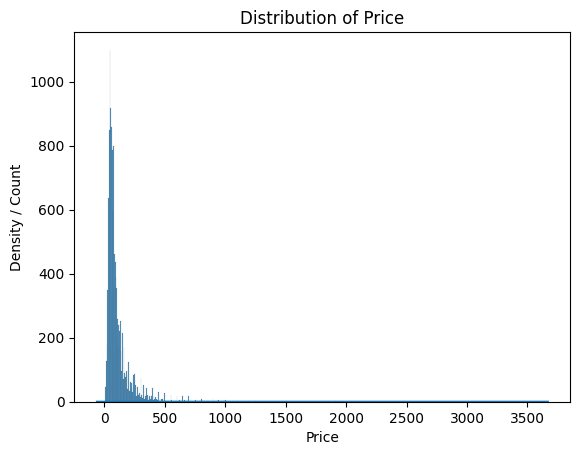

In [98]:
# Price distribution
sns.histplot(df['price'])
sns.kdeplot(df['price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Density / Count')
plt.show()

Text(0.5, 1.0, 'Area vs Price')

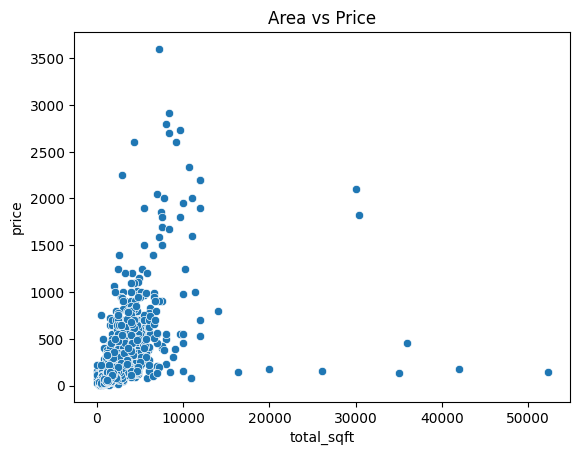

In [100]:
# Relationship between Area (total_sqft) and Price
sns.scatterplot(x='total_sqft', y='price', data=df)
plt.title('Area vs Price')

Text(0.5, 1.0, 'Price vs Bathrooms')

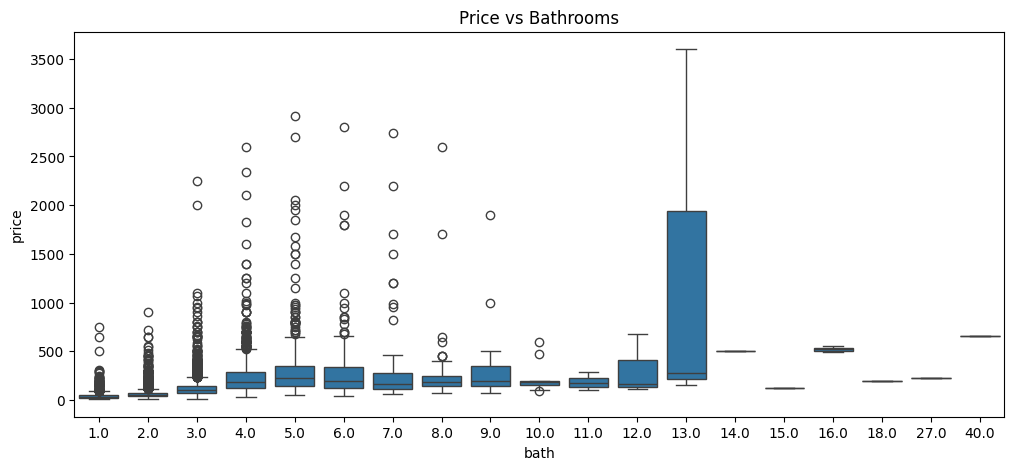

In [107]:
# Effects of bathrooms on price
plt.figure(figsize=(12, 5))
sns.boxplot(x='bath', y='price', data=df)
plt.title('Price vs Bathrooms')

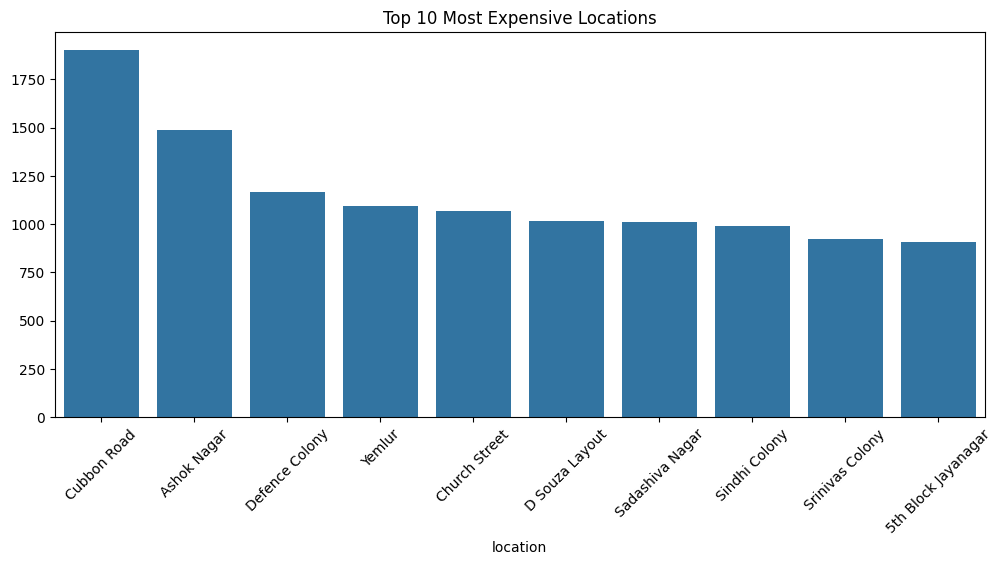

In [111]:
# Top 10 most expensive locations
locations = df.groupby('location')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=locations.index, y=locations.values)
plt.xticks(rotation=45)
plt.title('Top 10 Most Expensive Locations')
plt.show()

<Axes: >

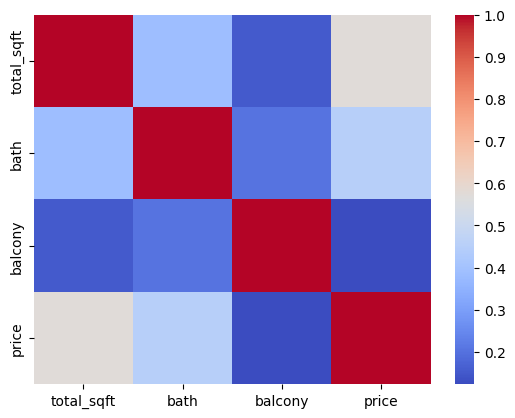

In [120]:
# Correlation between numeric values
c = df[['total_sqft', 'bath', 'balcony', 'price']].corr()
sns.heatmap(c, cmap='coolwarm')

## Exporting the cleaned data


In [123]:
# save
df.to_csv('drive/MyDrive/Tek works/cleaned_Bengaluru_House_data.csv', index=False)